In [ ]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tqdm.notebook import tqdm
from sklearn.utils import shuffle
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import Perceptron

## Generate the data

In [ ]:
seed = 27

# Load the digits dataset
digits = load_digits(return_X_y=True)
X, Y = digits[0], digits[1]
print(X.shape, Y.shape)

# Split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed, shuffle=True)

(1797, 64) (1797,)


## Define the Perceptron Model

In [ ]:
class CustomPerceptron:
    def __init__(self, num_features:int, lr:float=0.1):
        # Initialize the linear layer
        # Adding one for bias
        # self.W = np.random.normal(0, 0.1/np.sqrt(num_features), (num_features+1))
        self.W = np.zeros((num_features+1))
        self.lr = lr

    # Define a custom activation function
    def activation_function(self, x):
        out = 1 if x >= 0 else -1
        return out

    # Define a custom objective function
    def loss_fn(self, pred, target):
        return target*pred

    # The forward pass
    def forward(self, x):
        # Add bias to the input
        x = np.append(x, [1])
        out = self.W@x
        out = self.activation_function(out)
        return out

    def weight_update(self, error, input, target):
        if error < 0:
            # Add another column to denote bias
            input = np.append(input, [1])
            self.W = self.W + self.lr * target * input

In [ ]:
def train_model(model:CustomPerceptron,
                num_iters:int, X_train, Y_train):
    misclassification_iter = list()
    # Perform Training
    for iter in range(num_iters):
        num_misclassifications = 0
        for i in tqdm(range(len(X_train))):
            # Get the prediction
            pred = model.forward(X_train[i])
            # Calculate the error
            error = model.loss_fn(pred, Y_train[i])
            num_misclassifications+= 1 if error < 0 else 0
            # Update the weights
            model.weight_update(error, X_train[i], Y_train[i])
        misclassification_iter.append(num_misclassifications)
        print("Number of Misclassifications in iteration", iter+1, ":", num_misclassifications, "\n\n")
        if num_misclassifications == 0:
            break
    return model, misclassification_iter

In [ ]:
num_iters = 100
num_classes = 10
lr = 0.2

models, models_error = list(), list()
# Save a model for each class
for i in tqdm(range(num_classes)):
    # Initialize the model
    model = CustomPerceptron(X_train.shape[1], lr)
    # Find indices of current class
    indices = np.where(Y_train==i)[0]
    # Remaining indices
    inv_indices = np.delete(np.arange(len(Y_train)), indices)
    # Create the corresponding dataset
    x_train = np.concatenate((X_train[indices], X_train[inv_indices]), axis=0)
    y_train = np.concatenate((np.ones(len(indices)), np.ones(len(inv_indices))*-1), axis=0)
    x_train, y_train = shuffle(x_train, y_train)
    print("Model ", i+1, ":\n===========================\n\n")
    # Finally train the model and save it
    model, model_error = train_model(model, num_iters, x_train, y_train)
    models.append(model)
    models_error.append(model_error)

  0%|          | 0/10 [00:00<?, ?it/s]

Model  1 :




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 1 : 32 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 2 : 16 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 3 : 11 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 4 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 5 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 6 : 5 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 7 : 0 


Model  2 :




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 1 : 113 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 2 : 76 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 3 : 65 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 4 : 55 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 5 : 59 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 6 : 55 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 7 : 53 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 8 : 45 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 9 : 53 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 10 : 40 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 11 : 46 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 12 : 52 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 13 : 49 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 14 : 47 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 15 : 51 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 16 : 46 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 17 : 43 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 18 : 44 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 19 : 42 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 20 : 45 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 21 : 41 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 22 : 41 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 23 : 48 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 24 : 43 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 25 : 41 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 26 : 42 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 27 : 42 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 28 : 38 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 29 : 40 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 30 : 46 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 31 : 40 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 32 : 40 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 33 : 37 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 34 : 35 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 35 : 41 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 36 : 40 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 37 : 40 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 38 : 39 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 39 : 43 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 40 : 42 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 41 : 32 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 42 : 37 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 43 : 39 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 44 : 37 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 45 : 39 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 46 : 36 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 47 : 38 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 48 : 40 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 49 : 38 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 50 : 35 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 51 : 36 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 52 : 38 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 53 : 37 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 54 : 40 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 55 : 41 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 56 : 33 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 57 : 35 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 58 : 41 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 59 : 37 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 60 : 36 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 61 : 33 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 62 : 33 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 63 : 47 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 64 : 38 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 65 : 39 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 66 : 32 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 67 : 40 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 68 : 37 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 69 : 37 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 70 : 34 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 71 : 39 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 72 : 36 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 73 : 37 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 74 : 34 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 75 : 36 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 76 : 37 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 77 : 41 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 78 : 41 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 79 : 39 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 80 : 38 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 81 : 38 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 82 : 39 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 83 : 32 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 84 : 30 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 85 : 40 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 86 : 31 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 87 : 33 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 88 : 32 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 89 : 33 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 90 : 41 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 91 : 42 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 92 : 38 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 93 : 37 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 94 : 38 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 95 : 29 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 96 : 38 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 97 : 30 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 98 : 37 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 99 : 35 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 100 : 39 


Model  3 :




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 1 : 60 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 2 : 24 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 3 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 4 : 16 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 5 : 17 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 6 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 7 : 0 


Model  4 :




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 1 : 88 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 2 : 39 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 3 : 41 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 4 : 29 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 5 : 29 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 6 : 29 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 7 : 30 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 8 : 31 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 9 : 32 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 10 : 25 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 11 : 18 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 12 : 23 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 13 : 29 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 14 : 29 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 15 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 16 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 17 : 20 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 18 : 18 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 19 : 24 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 20 : 23 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 21 : 21 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 22 : 23 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 23 : 18 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 24 : 21 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 25 : 22 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 26 : 25 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 27 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 28 : 22 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 29 : 18 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 30 : 17 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 31 : 16 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 32 : 17 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 33 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 34 : 26 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 35 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 36 : 20 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 37 : 16 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 38 : 23 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 39 : 21 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 40 : 22 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 41 : 22 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 42 : 21 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 43 : 14 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 44 : 21 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 45 : 18 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 46 : 22 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 47 : 18 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 48 : 17 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 49 : 18 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 50 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 51 : 22 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 52 : 25 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 53 : 21 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 54 : 15 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 55 : 18 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 56 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 57 : 21 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 58 : 22 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 59 : 20 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 60 : 13 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 61 : 20 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 62 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 63 : 18 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 64 : 13 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 65 : 18 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 66 : 17 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 67 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 68 : 16 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 69 : 23 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 70 : 17 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 71 : 22 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 72 : 15 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 73 : 20 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 74 : 11 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 75 : 20 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 76 : 17 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 77 : 15 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 78 : 22 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 79 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 80 : 13 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 81 : 18 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 82 : 11 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 83 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 84 : 22 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 85 : 17 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 86 : 14 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 87 : 25 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 88 : 15 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 89 : 13 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 90 : 18 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 91 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 92 : 15 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 93 : 16 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 94 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 95 : 20 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 96 : 13 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 97 : 18 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 98 : 21 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 99 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 100 : 13 


Model  5 :




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 1 : 35 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 2 : 16 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 3 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 4 : 9 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 5 : 14 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 6 : 12 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 7 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 8 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 9 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 10 : 9 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 11 : 9 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 12 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 13 : 5 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 14 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 15 : 5 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 16 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 17 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 18 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 19 : 2 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 20 : 3 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 21 : 0 


Model  6 :




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 1 : 56 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 2 : 30 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 3 : 15 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 4 : 17 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 5 : 28 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 6 : 14 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 7 : 11 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 8 : 17 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 9 : 9 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 10 : 12 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 11 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 12 : 2 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 13 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 14 : 18 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 15 : 11 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 16 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 17 : 9 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 18 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 19 : 7 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 20 : 13 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 21 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 22 : 13 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 23 : 5 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 24 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 25 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 26 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 27 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 28 : 9 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 29 : 9 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 30 : 12 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 31 : 7 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 32 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 33 : 5 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 34 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 35 : 2 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 36 : 2 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 37 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 38 : 0 


Model  7 :




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 1 : 51 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 2 : 12 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 3 : 12 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 4 : 15 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 5 : 13 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 6 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 7 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 8 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 9 : 11 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 10 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 11 : 9 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 12 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 13 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 14 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 15 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 16 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 17 : 7 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 18 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 19 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 20 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 21 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 22 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 23 : 5 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 24 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 25 : 5 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 26 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 27 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 28 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 29 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 30 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 31 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 32 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 33 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 34 : 2 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 35 : 7 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 36 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 37 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 38 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 39 : 2 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 40 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 41 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 42 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 43 : 5 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 44 : 2 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 45 : 2 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 46 : 2 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 47 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 48 : 0 


Model  8 :




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 1 : 51 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 2 : 34 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 3 : 21 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 4 : 17 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 5 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 6 : 19 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 7 : 12 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 8 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 9 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 10 : 16 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 11 : 16 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 12 : 12 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 13 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 14 : 16 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 15 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 16 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 17 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 18 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 19 : 12 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 20 : 9 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 21 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 22 : 13 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 23 : 7 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 24 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 25 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 26 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 27 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 28 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 29 : 12 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 30 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 31 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 32 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 33 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 34 : 4 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 35 : 7 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 36 : 7 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 37 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 38 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 39 : 6 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 40 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 41 : 7 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 42 : 7 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 43 : 10 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 44 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 45 : 8 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 46 : 7 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 47 : 11 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 48 : 1 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 49 : 0 


Model  9 :




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 1 : 138 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 2 : 110 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 3 : 97 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 4 : 102 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 5 : 95 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 6 : 102 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 7 : 99 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 8 : 94 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 9 : 95 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 10 : 91 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 11 : 84 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 12 : 85 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 13 : 93 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 14 : 84 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 15 : 83 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 16 : 89 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 17 : 88 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 18 : 89 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 19 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 20 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 21 : 87 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 22 : 90 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 23 : 87 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 24 : 87 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 25 : 91 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 26 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 27 : 86 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 28 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 29 : 90 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 30 : 83 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 31 : 85 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 32 : 86 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 33 : 87 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 34 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 35 : 77 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 36 : 85 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 37 : 78 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 38 : 80 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 39 : 84 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 40 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 41 : 90 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 42 : 85 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 43 : 83 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 44 : 86 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 45 : 88 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 46 : 87 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 47 : 74 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 48 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 49 : 78 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 50 : 84 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 51 : 85 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 52 : 84 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 53 : 77 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 54 : 75 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 55 : 83 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 56 : 78 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 57 : 83 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 58 : 90 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 59 : 68 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 60 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 61 : 80 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 62 : 72 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 63 : 78 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 64 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 65 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 66 : 83 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 67 : 90 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 68 : 88 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 69 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 70 : 86 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 71 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 72 : 92 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 73 : 85 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 74 : 72 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 75 : 73 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 76 : 89 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 77 : 79 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 78 : 78 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 79 : 79 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 80 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 81 : 77 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 82 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 83 : 91 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 84 : 80 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 85 : 74 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 86 : 77 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 87 : 85 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 88 : 77 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 89 : 82 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 90 : 74 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 91 : 83 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 92 : 84 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 93 : 75 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 94 : 82 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 95 : 75 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 96 : 79 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 97 : 84 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 98 : 81 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 99 : 79 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 100 : 76 


Model  10 :




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 1 : 105 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 2 : 55 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 3 : 54 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 4 : 52 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 5 : 45 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 6 : 44 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 7 : 42 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 8 : 51 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 9 : 42 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 10 : 41 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 11 : 39 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 12 : 43 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 13 : 33 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 14 : 41 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 15 : 41 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 16 : 38 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 17 : 37 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 18 : 36 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 19 : 40 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 20 : 34 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 21 : 36 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 22 : 32 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 23 : 26 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 24 : 38 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 25 : 27 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 26 : 28 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 27 : 28 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 28 : 33 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 29 : 32 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 30 : 35 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 31 : 36 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 32 : 27 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 33 : 30 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 34 : 26 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 35 : 25 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 36 : 28 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 37 : 34 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 38 : 34 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 39 : 29 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 40 : 29 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 41 : 30 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 42 : 35 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 43 : 31 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 44 : 28 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 45 : 28 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 46 : 27 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 47 : 28 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 48 : 25 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 49 : 30 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 50 : 31 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 51 : 25 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 52 : 24 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 53 : 33 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 54 : 22 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 55 : 29 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 56 : 29 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 57 : 30 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 58 : 27 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 59 : 29 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 60 : 26 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 61 : 29 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 62 : 27 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 63 : 30 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 64 : 27 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 65 : 36 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 66 : 23 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 67 : 36 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 68 : 26 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 69 : 25 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 70 : 26 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 71 : 33 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 72 : 28 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 73 : 27 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 74 : 27 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 75 : 23 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 76 : 20 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 77 : 28 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 78 : 25 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 79 : 27 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 80 : 32 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 81 : 23 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 82 : 24 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 83 : 27 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 84 : 22 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 85 : 31 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 86 : 30 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 87 : 24 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 88 : 35 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 89 : 28 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 90 : 27 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 91 : 21 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 92 : 26 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 93 : 27 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 94 : 31 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 95 : 24 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 96 : 23 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 97 : 26 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 98 : 25 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 99 : 29 




  0%|          | 0/1437 [00:00<?, ?it/s]

Number of Misclassifications in iteration 100 : 22 




## Let's visualize what the number of misclassified samples look like in each epoch for each model

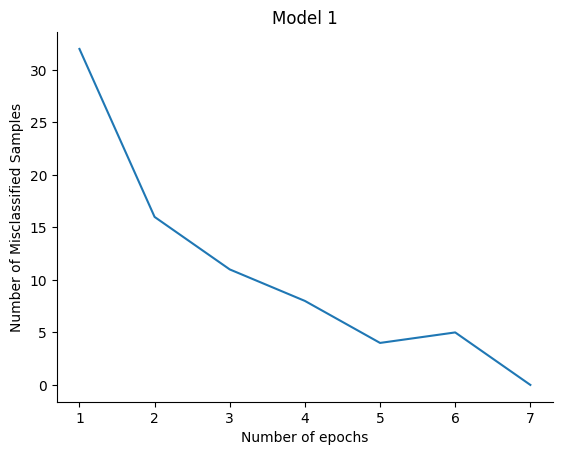

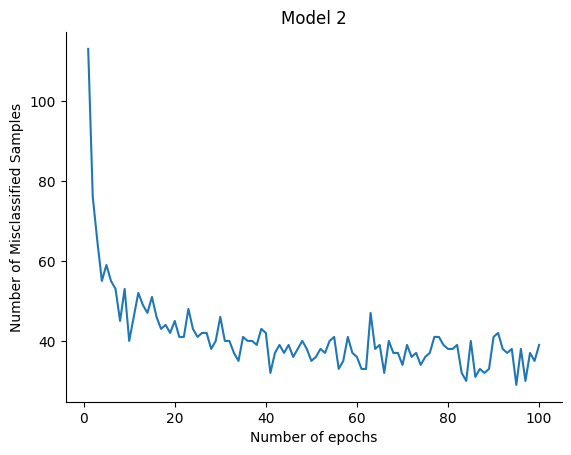

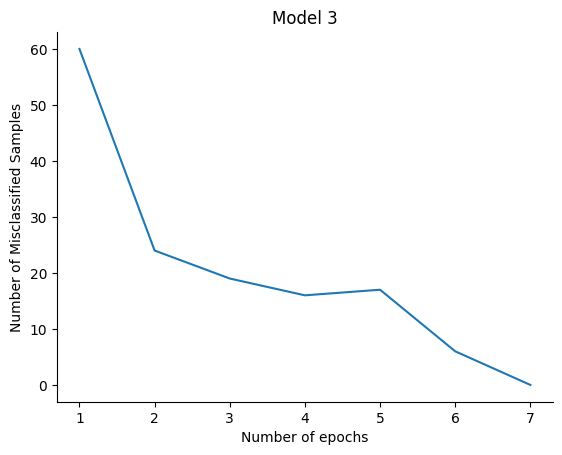

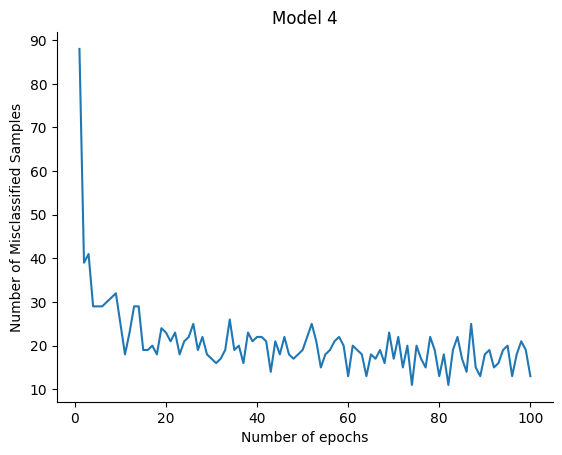

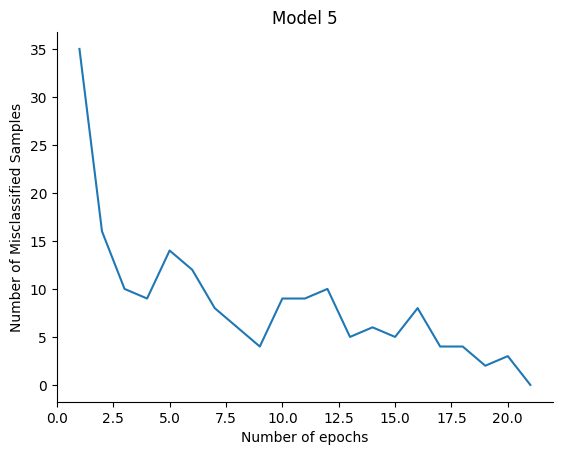

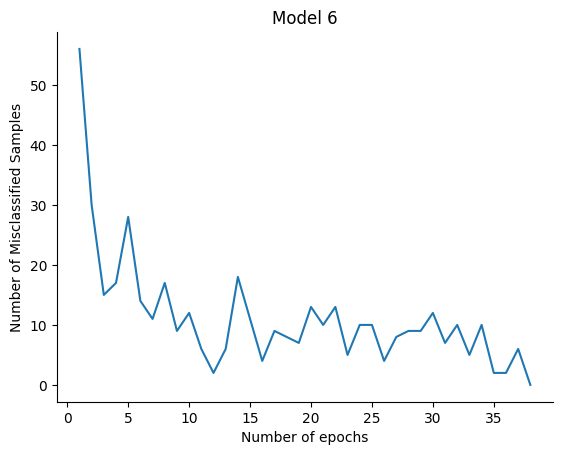

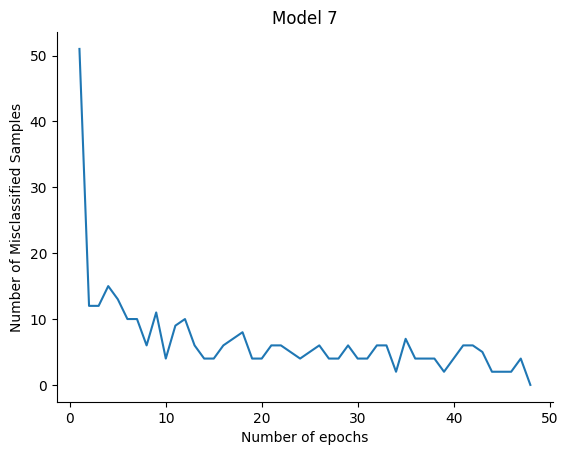

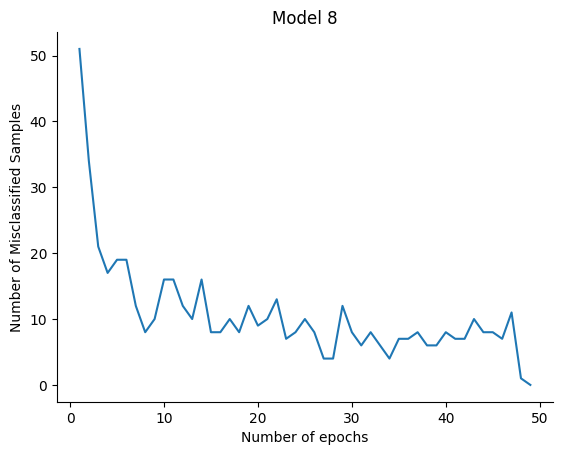

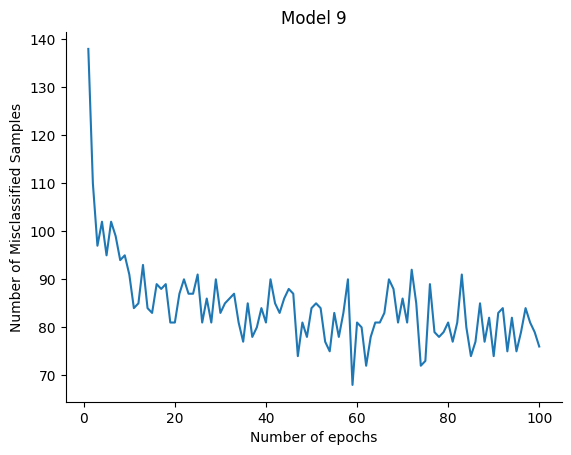

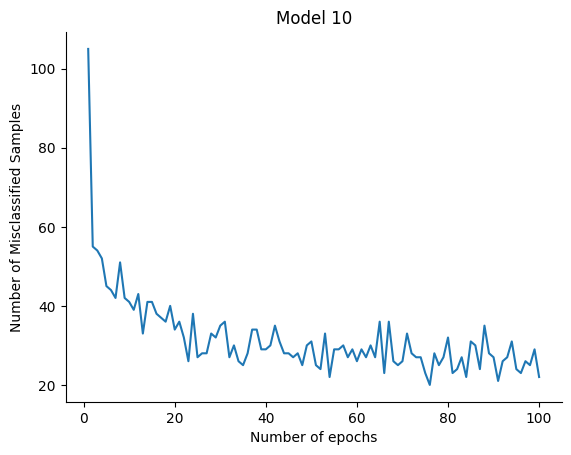

In [ ]:
for i in range(num_classes):
    length = len(models_error[i])
    sns.lineplot(x=np.arange(1, length+1), y=models_error[i])
    plt.xlabel("Number of epochs")
    plt.ylabel("Number of Misclassified Samples")
    sns.despine()
    plt.title("Model "+str(i+1))
    plt.show()
    print("\n")

## Find out the performance of our custom model on the Test Set

In [ ]:
# Now get the predictions on the test set
final_preds = np.zeros(X_test.shape[0])
for i in range(num_classes):
    preds = np.asarray([models[i].forward(X_test[j]) for j in range(len(X_test))])
    final_preds[np.where(preds == 1)[0]] = i

# Calculate all the scores
print("Micro Precision:", precision_score(Y_test, final_preds, average="micro"))
print("Micro Recall:", recall_score(Y_test, final_preds, average="micro"))

print("\n\nMacro Precision:", precision_score(Y_test, final_preds, average="macro"))
print("Macro Recall:", recall_score(Y_test, final_preds, average="macro"))

print("\n\nAccuracy:", accuracy_score(Y_test, final_preds))

Micro Precision: 0.8916666666666667
Micro Recall: 0.8916666666666667


Macro Precision: 0.9042634141720478
Macro Recall: 0.8927066289566291


Accuracy: 0.8916666666666667


## Train the sklearn variant and check test set accuracy

In [ ]:
# Train the models
models, models_error = list(), list()
# Save a model for each class
for i in tqdm(range(num_classes)):
    # Initialize the model
    model = Perceptron(eta0=lr, max_iter=num_iters)
    # Find indices of current class
    indices = np.where(Y_train==i)[0]
    # Remaining indices
    inv_indices = np.delete(np.arange(len(Y_train)), indices)
    # Create the corresponding dataset
    x_train = np.concatenate((X_train[indices], X_train[inv_indices]), axis=0)
    y_train = np.concatenate((np.ones(len(indices)), np.zeros(len(inv_indices))), axis=0)
    # Finally train and save the model
    model.fit(x_train, y_train)
    models.append(model)

# Now get the predictions on the test set
final_preds = np.zeros(X_test.shape[0])
for i in range(num_classes):
    preds = models[i].predict(X_test)
    final_preds[np.where(preds == 1)[0]] = i

# Calculate all the scores
print("Micro Precision:", precision_score(Y_test, final_preds, average="micro"))
print("Micro Recall:", recall_score(Y_test, final_preds, average="micro"))

print("\n\nMacro Precision:", precision_score(Y_test, final_preds, average="macro"))
print("Macro Recall:", recall_score(Y_test, final_preds, average="macro"))

print("\n\nAccuracy:", accuracy_score(Y_test, final_preds))

  0%|          | 0/10 [00:00<?, ?it/s]

Micro Precision: 0.7777777777777778
Micro Recall: 0.7777777777777778


Macro Precision: 0.8689601121073902
Macro Recall: 0.7822236040986041


Accuracy: 0.7777777777777778
